In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
df.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3432,I,0.36,0.27,0.09,0.219,0.097,0.0405,0.065,6


In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df.shape

(4177, 9)

In [9]:
df=pd.DataFrame(data=df)

In [10]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<Axes: >

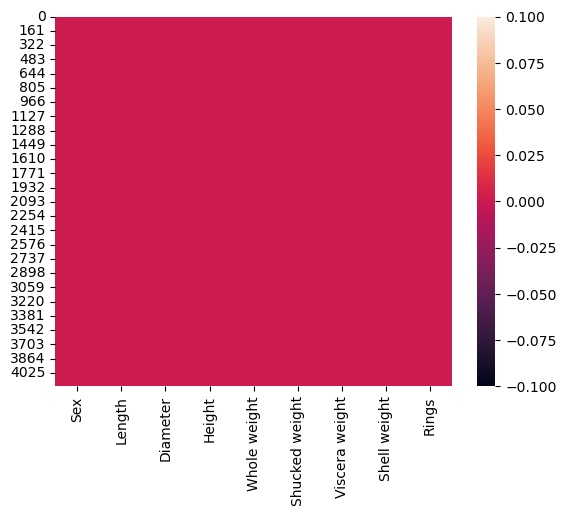

In [12]:
sns.heatmap(df.isnull())

<Axes: xlabel='Diameter', ylabel='Density'>

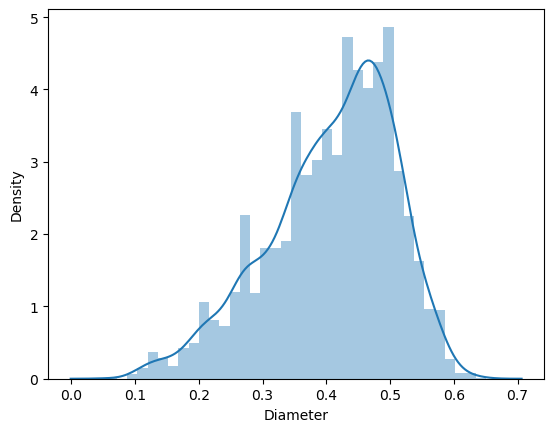

In [16]:
sns.distplot(df['Diameter'])

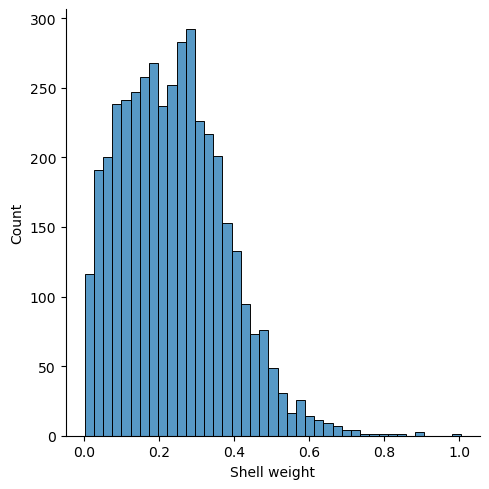

In [19]:
sns.displot(df['Shell weight'])

In [20]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [21]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [22]:
lencode=LabelEncoder()

In [24]:
df['Sex']=lencode.fit_transform(df['Sex'])

In [25]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


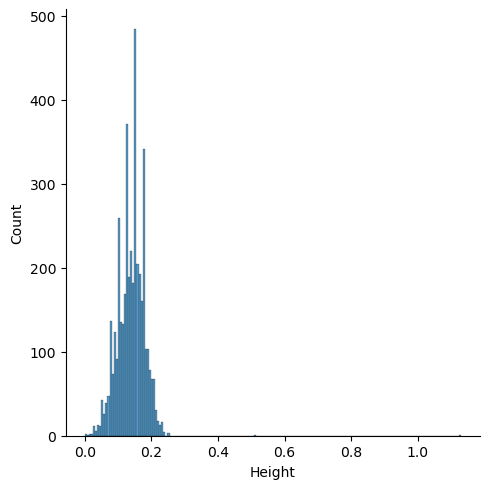

In [27]:
sns.displot(df['Height'])

<Axes: xlabel='Height', ylabel='Count'>

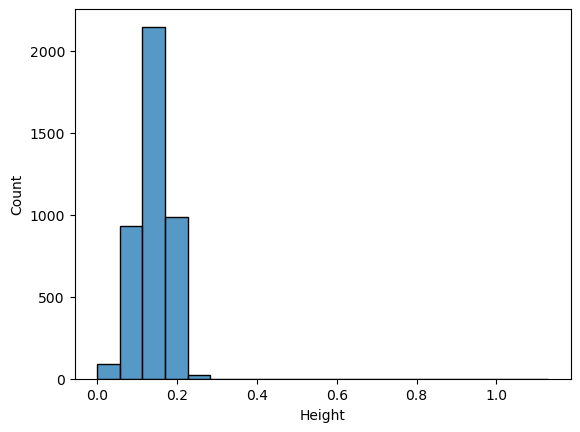

In [29]:
sns.histplot(df['Height'],bins=20)

<Axes: xlabel='Rings', ylabel='Count'>

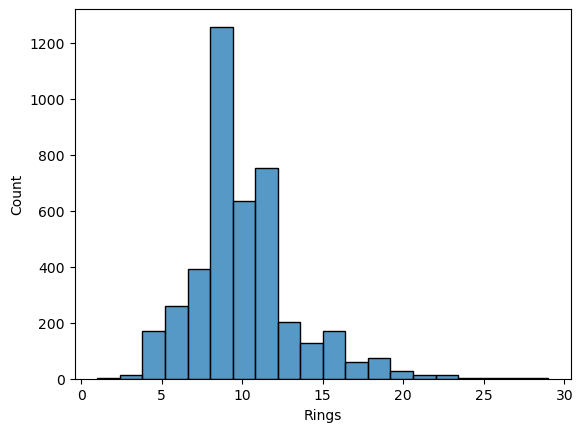

In [30]:
sns.histplot(df['Rings'],bins=20)

<Axes: xlabel='Whole weight', ylabel='Density'>

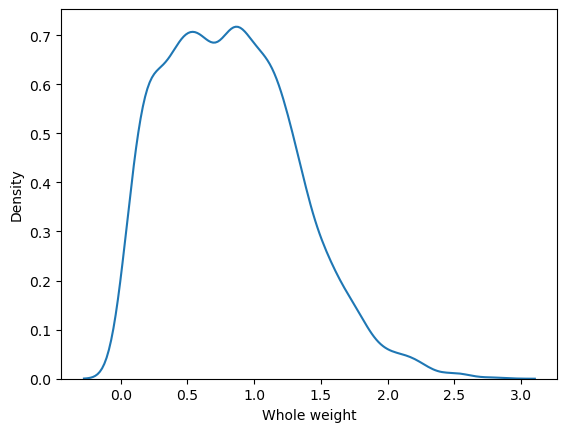

In [34]:
sns.kdeplot(df['Whole weight'])

<Axes: xlabel='Shell weight', ylabel='Height'>

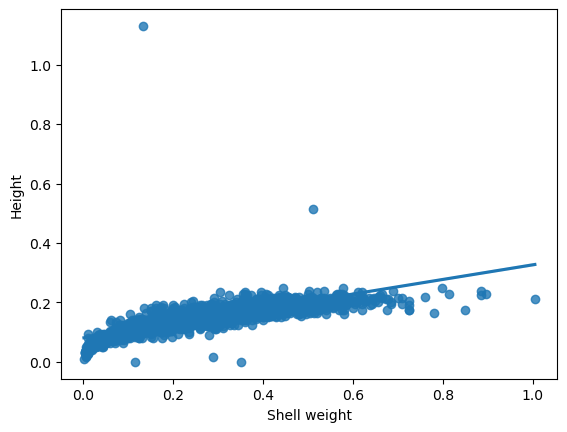

In [35]:
sns.regplot(x='Shell weight',y='Height',data=df)

<Axes: xlabel='Rings', ylabel='Diameter'>

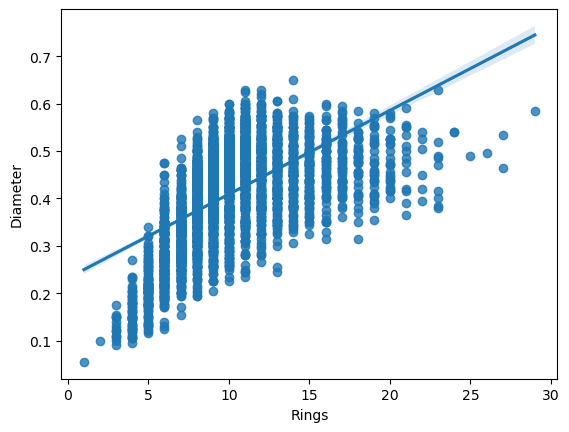

In [36]:
sns.regplot(x='Rings',y='Diameter',data=df)

<Axes: xlabel='Whole weight', ylabel='Diameter'>

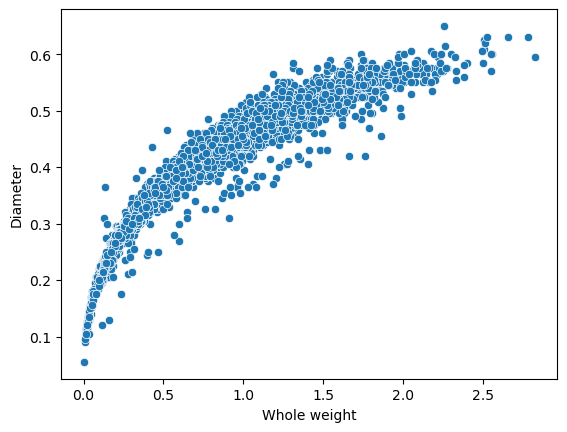

In [37]:
sns.scatterplot(x='Whole weight',y='Diameter',data=df)

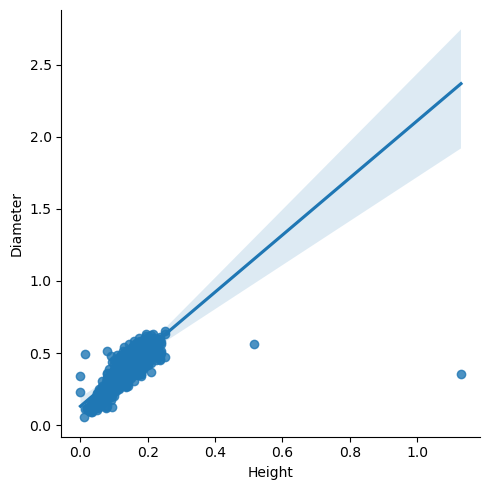

In [38]:
sns.lmplot(x='Height',y='Diameter',data=df)

In [39]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [40]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [41]:
# Removing Outliers
df['Height']=np.sqrt(df['Height'])

In [42]:
# Checking the skewness of the dataset
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

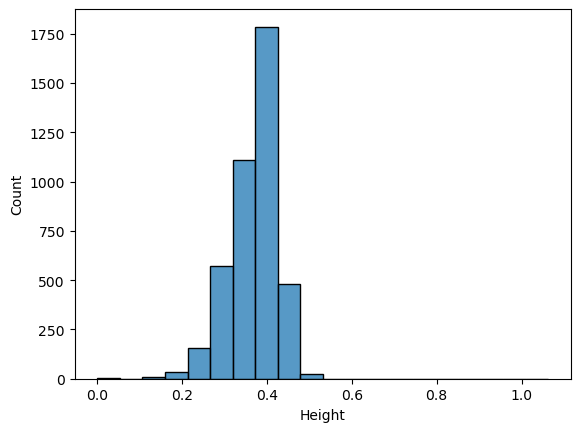

In [45]:
# plotting the height to check the outliers reduction
sns.histplot(df['Height'],bins=20)

In [48]:
# Checking the zscore to detect Outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [49]:
dfnew=df[(dfzscore<3).all(axis=1)]

In [50]:
dfnew

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960,10


In [51]:
print('dfnew.shape',dfnew.shape)

dfnew.shape (4019, 9)


In [52]:
df=dfnew

In [53]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682
Length,-0.043978,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535
Diameter,-0.046893,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657
Height,-0.047602,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311
Whole weight,-0.034812,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911
Shucked weight,-0.016429,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522
Viscera weight,-0.045187,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584
Shell weight,-0.043998,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817
Rings,-0.033682,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000


In [58]:
sns.heatmap?

<Axes: >

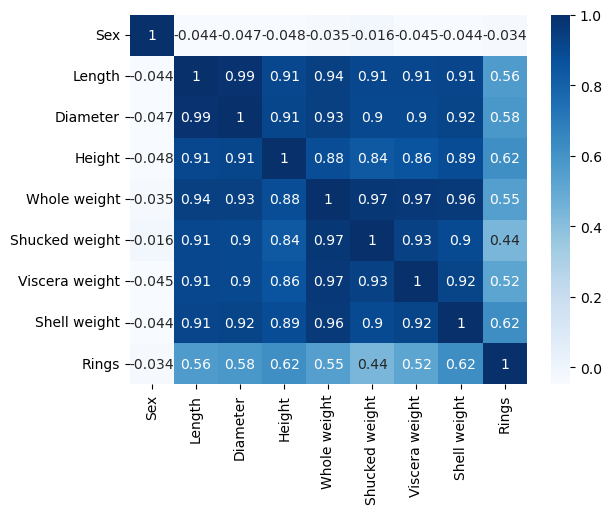

In [63]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [65]:
# finding the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
x=df.iloc[:,0:-1]

In [67]:
x.shape

(4019, 8)

In [68]:
x.shape[1]

8

In [74]:
def vif_cal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)
vif_cal()

   vif factor        features
0    2.632493             Sex
1  802.340579          Length
2  763.963727        Diameter
3  154.948351          Height
4  441.891678    Whole weight
5  110.275122  Shucked weight
6   65.499021  Viscera weight
7   92.744708    Shell weight


In [75]:
x.values

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [77]:
#dropping correlated columns to reduce outliers
df.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [78]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.308221,0.5140,0.1010,0.1500,15
1,2,0.265,0.300000,0.2255,0.0485,0.0700,7
2,0,0.420,0.367423,0.6770,0.1415,0.2100,9
3,2,0.365,0.353553,0.5160,0.1140,0.1550,10
4,1,0.255,0.282843,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490,11
4173,2,0.440,0.367423,0.9660,0.2145,0.2605,10
4174,2,0.475,0.452769,1.1760,0.2875,0.3080,9
4175,0,0.485,0.387298,1.0945,0.2610,0.2960,10


In [79]:
# Scaling the datasets
scale=StandardScaler()

In [80]:
xn=scale.fit_transform(x)

In [81]:
xn.shape

(4019, 8)

In [82]:
y=df.iloc[:,-1]

In [83]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4019, dtype: int64

In [84]:
y.shape

(4019,)

In [85]:
# Splitting the dataset into x and y for training and testing purpose
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=55)

In [86]:
x_train.shape

(2813, 8)

In [87]:
x_test.shape

(1206, 8)

In [88]:
y_test.shape

(1206,)

In [89]:
y_train.shape

(2813,)

In [90]:
# Importing Linear Regression model
lr=LinearRegression()

In [92]:
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
lr.coef_

array([  0.0446385 ,  -4.21513145,  11.95933179,  18.13445675,
         7.11052295, -17.60233059,  -6.03921254,   8.27584953])

In [94]:
features=['Sex','Diameter','Height','Whole Height','Visera weight','Shell weight']
list(zip(lr.coef_,features))

[(0.04463849904188599, 'Sex'),
 (-4.215131453607697, 'Diameter'),
 (11.959331793582987, 'Height'),
 (18.134456751328933, 'Whole Height'),
 (7.110522948674411, 'Visera weight'),
 (-17.602330592990917, 'Shell weight')]

In [96]:
lr.intercept_

-0.012103328566620775

In [97]:
lr.score(x_train,y_train)

0.5237782196458487

In [98]:
pred=lr.predict(x_test)

In [99]:
print('predicted values:',pred)

predicted values: [12.75610355 11.64280177  9.42458852 ... 10.34770776  9.62325147
 10.9386259 ]


In [101]:
preddf=pd.DataFrame(data=pred)

In [102]:
preddf

,0
0,12.756104
1,11.642802
2,9.424589
3,9.516000
4,10.787582
...,...
1201,5.965728
1202,11.261242
1203,10.347708
1204,9.623251


In [104]:
lr.score(x_test,y_test)

0.49153311222440854

In [105]:
print('Mean Squared Error:',mean_squared_error(y_test,pred))

Mean Squared Error: 4.041160464012153


In [106]:
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))

Mean Absolute Error: 1.5082661109787796


In [107]:
print('Root Mean Square:', r2_score(y_test,pred))

Root Mean Square: 0.49153311222440854


In [108]:
# Regularizing the model
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score

In [109]:
rdg=Ridge(alpha=.0001,random_state=45)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)
rdg.coef_

array([  0.04463783,  -4.21320824,  11.95732394,  18.13309269,
         7.11016234, -17.6019714 ,  -6.0386697 ,   8.27643472])

In [110]:
predict=rdg.predict(x_test)

In [111]:
predict

array([12.75606486, 11.64277995,  9.42463021, ..., 10.34767713,
        9.62320403, 10.93861347])

In [113]:
r2Score=r2_score(y_test,predict)

In [114]:
r2Score

0.49153314492694833

In [115]:
lso=Lasso(alpha=.0001,random_state=47)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)
lso.coef_

array([  0.04454201,  -3.58209939,  11.26563639,  17.92669513,
         7.01796885, -17.53401103,  -5.85581697,   8.38255696])

In [117]:
predict=lso.predict(x_test)

In [118]:
predict

array([12.73959649, 11.6350687 ,  9.43698596, ..., 10.33711383,
        9.61092959, 10.94585975])

In [119]:
r2Score=r2_score(y_test,predict)

In [120]:
r2Score

0.49156354090716115